# Handwritten Digits Recognition 02 - TensorFlow

From the table below, we see that MNIST database is way larger than scikit-learn database, which we modelled in the previous notebook. Both number of samples and size of each sample are significantly higher. The good new is that, with TensorFlow and Keras, we can build neural networks, which are powerful enough to handle MNIST database! In this notebook, we are going to use Convolutional Neural Network (CNN) to perform image recognition.

|           | Scikit-learn database | MNIST database |
|-----------|-----------------------|----------------|
| Samples   | 1797                  | 70,000         |
| Dimensions | 64 (8x8)              | 784 (28x28)    |

1. More information about Scikit-learn Database: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
2. More information about MNIST Database: https://en.wikipedia.org/wiki/MNIST_database

## Loading MNIST database

We are going to load MNIST database using utilities provided by TensorFlow. When importing TensorFlow, I always first check if it is using the GPU. 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow Version", tf.__version__)

if tf.test.is_gpu_available:
    print("Device:" ,tf.test.gpu_device_name())

TensorFlow Version 2.1.0
Device: /device:GPU:0


Now, load the MNIST database using TensorFlow. From the output, we can see that the images are 28x28. The database contains 60,000 training and 10,000 testing images. There is no missing entries.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Before we get our hands dirty with all the hardwork, let's just take a moment and look at some digits in the dataset. The digits displayed are the first eight digits in the set. We can see that the image quality is quite high, significantly better than the ones in scikit-learn digits set.

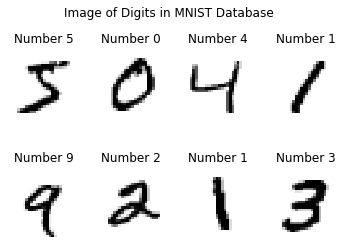

In [3]:
fig, axes = plt.subplots(2, 4)
for i, ax in zip(range(8), axes.flatten()):
    ax.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Number %d" % y_train[i])
    ax.set_axis_off()

fig.suptitle("Image of Digits in MNIST Database")
plt.show()

## Training a convolutional neural network with TensorFlow

Each pixel in the images is stored as integers ranging from 0 to 255. CNN requires us to normalize the numbers to be between 0 and 1. We also increased a dimension so that the images can be fed into the CNN. Also, convert the labels (*y_train, y_test*) to one-hot encoding since we are categorizing images.

In [4]:
# Normalize and flatten the images
x_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test  = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
# Convert to one-hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

Using TensorFlow backend.


This is the structure of the convolutional neural network. We have two convolution layers to extract features, along with two pooling layers to reduce the dimension of the features. The dropout layer disgards 20% of the data to prevent overfitting. The multi-dimensional data is then flattened in to vectors. The two dence layers with 128 neurons are trained to do the classification. Lastly, the dense layer with 10 neurons output the results.

In [6]:
model = keras.Sequential([
    
    keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    
    keras.layers.Conv2D(32, (5,5), activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Flatten(),
    
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    
    keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.1625 - accuracy: 0.9496
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0563 - accuracy: 0.9822
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0423 - accuracy: 0.9865
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0351 - accuracy: 0.9888
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0290 - accuracy: 0.9908
Epoch 6/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0255 - accuracy: 0.9921
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0218 - accuracy: 0.9929
Epoch 8/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0199 - accuracy: 0.9937
Epoch 9/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0182 - accuracy: 0.9942
Epoc

In [7]:
# Test the accuracy of the model on the testing set
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 2)

print()
print('Test accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0290 - accuracy: 0.9921

Test accuracy: 0.9921


The accuracy of the CNN is 99.46% and its performance on the testing set is 99.21%. No overfitting. We have a robust model!

## Saving the trained model

Below is the summary of the model. It is amazing that we have trained 109,930 parameters! Now, save this model so we don't have to train it again in the future.

In [8]:
# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  6

Just like in the previous notebook, we can save this model as well.

In [10]:
model.save("CNN_model.h5")